**Problem Description** The problem this code solves is predicting the change in house prices over time across different boroughs in London. By analyzing data on various factors like median salary, number of crimes, life satisfaction, and others we aim to use these factors as predictors for changes in house prices in various boroughs of London, so the target variable will be the monthly percentage change in house prices.

**Data Description**
The dataset used is from a public Kaggle dataset and focuses on the housing market in London. It includes various socio-economic and demographic variables collected from different sources. The data is divided into two main files: monthly data and yearly data.
- Monthly Data: Contains variables like average house prices, number of crimes, and houses sold on a monthly basis.
- Yearly Data: Contains variables like population size, number of jobs, life satisfaction, recycling rates, median and mean salaries, and area size.

In [24]:
# Data Loading and Preparation
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the datasets
monthly_data = pd.read_csv('/kaggle/input/housing-in-london/housing_in_london_monthly_variables.csv')
yearly_data = pd.read_csv('/kaggle/input/housing-in-london/housing_in_london_yearly_variables.csv')

# Convert the 'date' columns to datetime format
monthly_data['date'] = pd.to_datetime(monthly_data['date'])
yearly_data['date'] = pd.to_datetime(yearly_data['date'], format='%Y-%m-%d')

# Extract the year from the date column to match both datasets
monthly_data['year'] = monthly_data['date'].dt.year
yearly_data['year'] = yearly_data['date'].dt.year

# Create a new target variable for the percentage change in house prices month-over-month
monthly_data['price_change'] = monthly_data.groupby('area')['average_price'].pct_change()

# Drop rows with NaN values generated from the pct_change calculation in the monthly data
monthly_data.dropna(subset=['price_change'], inplace=True)

# Merge the datasets on 'area' and 'year'
merged_data = pd.merge(monthly_data, yearly_data, on=['area', 'year'], how='left')

# Replace non-numeric values with NaN
merged_data.replace('-', np.nan, inplace=True)

# Convert relevant columns to numeric, forcing errors to NaN
for col in ['median_salary', 'mean_salary', 'no_of_crimes', 'number_of_jobs', 'houses_sold', 'area_size']:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Drop rows with any NaN values in the feature columns, including 'price_change'
merged_data.dropna(subset=['median_salary', 'mean_salary', 'no_of_crimes', 'number_of_jobs', 'houses_sold', 'area_size', 'price_change'], inplace=True)


In [25]:
# Exploratory Data Analysis (EDA)
# Visualizing data structure
print("Columns in merged_data:", merged_data.columns)
print(merged_data.head())

Columns in merged_data: Index(['date_x', 'area', 'average_price', 'code_x', 'houses_sold',
       'no_of_crimes', 'borough_flag_x', 'year', 'price_change', 'code_y',
       'date_y', 'median_salary', 'life_satisfaction', 'mean_salary',
       'recycling_pct', 'population_size', 'number_of_jobs', 'area_size',
       'no_of_houses', 'borough_flag_y'],
      dtype='object')
       date_x            area  average_price     code_x  houses_sold  \
71 2001-01-01  city of london         284262  E09000001         24.0   
72 2001-02-01  city of london         198137  E09000001         37.0   
73 2001-03-01  city of london         189033  E09000001         44.0   
74 2001-04-01  city of london         205494  E09000001         38.0   
75 2001-05-01  city of london         223459  E09000001         30.0   

    no_of_crimes  borough_flag_x  year  price_change     code_y     date_y  \
71           0.0               1  2001     -0.096927  E09000001 2001-12-01   
72           0.0               1  200

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

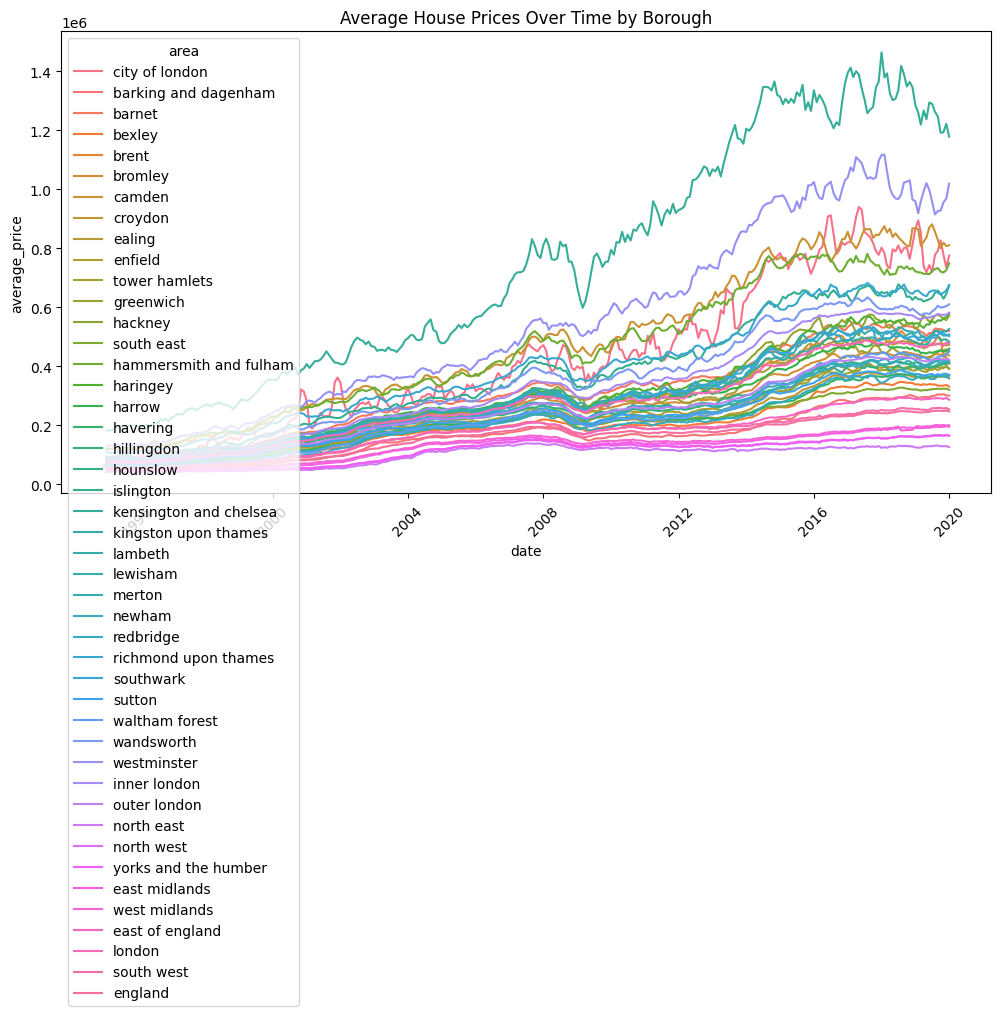

In [26]:
# Distribution of house prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='date', y='average_price', hue='area')
plt.title('Average House Prices Over Time by Borough')
plt.xticks(rotation=45)
plt.show()

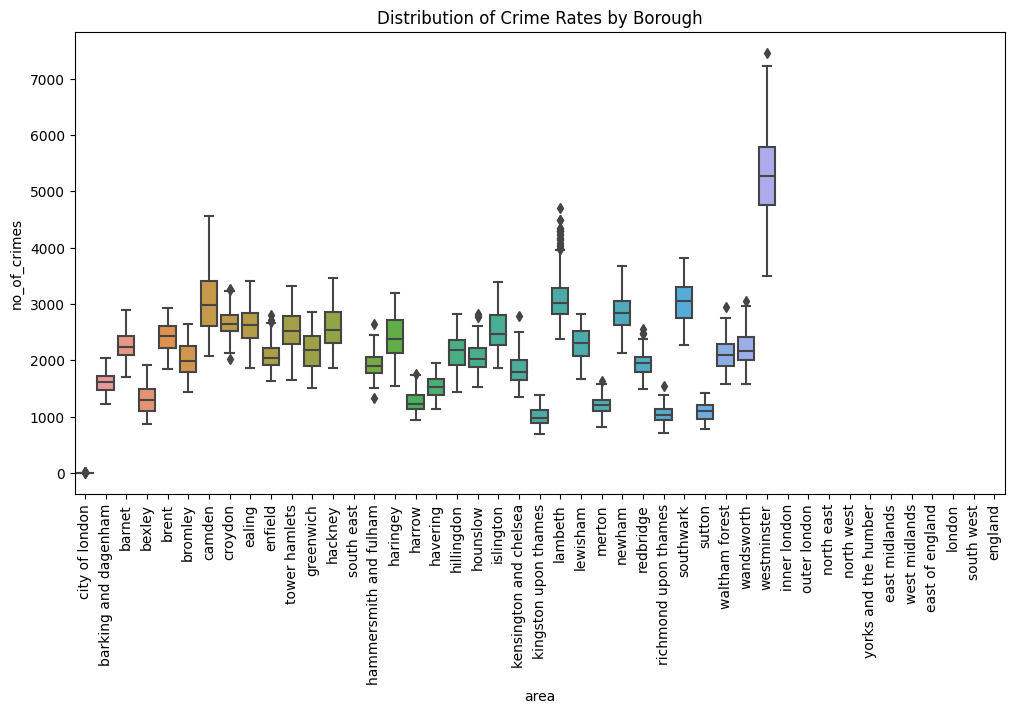

In [27]:
# Distribution of crime rates across different boroughs
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_data, x='area', y='no_of_crimes')
plt.title('Distribution of Crime Rates by Borough')
plt.xticks(rotation=90)
plt.show()

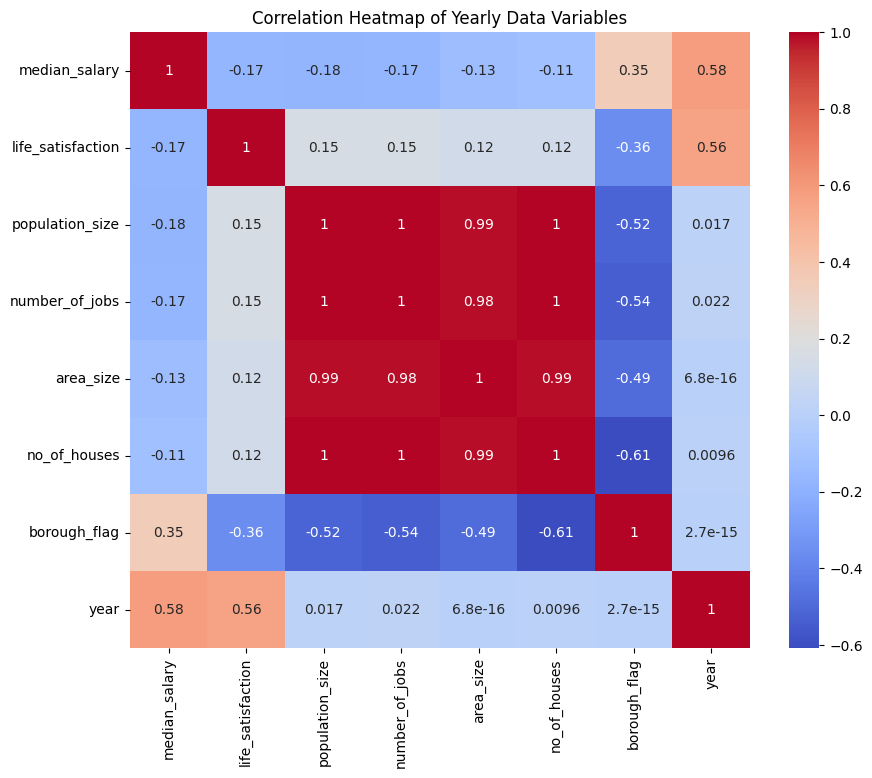

In [28]:
# Correlation heatmap to identify relationships between variables in the yearly dataset
numeric_columns = yearly_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Yearly Data Variables')
plt.show()

**Model Selection**
We will use a Linear Regression model to solve this problem. Linear Regression is a supervised machine learning model that assumes a linear relationship between the input features (independent variables) and the target variable (dependent variable). In this case, it will help us understand how various factors like median salary, number of jobs, and number of crimes impact the change in house prices over time.

In [29]:
# Model Building and Training

# Define the features (X) and target (y)
X = merged_data[['median_salary', 'mean_salary', 'no_of_crimes', 'number_of_jobs', 'houses_sold', 'area_size']]
y = merged_data['price_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("\nFirst 10 Predictions vs Actual Values:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.4f}, Actual: {y_test.iloc[i]:.4f}")


First 10 Predictions vs Actual Values:
Predicted: 0.0049, Actual: -0.0032
Predicted: 0.0083, Actual: 0.0264
Predicted: 0.0049, Actual: 0.0256
Predicted: 0.0031, Actual: 0.0244
Predicted: 0.0042, Actual: -0.0163
Predicted: 0.0057, Actual: 0.0000
Predicted: 0.0204, Actual: 0.0219
Predicted: 0.0092, Actual: 0.0056
Predicted: 0.0036, Actual: 0.0145
Predicted: 0.0045, Actual: 0.0026


In [30]:
## Model Analysis

# Analyze the coefficients of the linear regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nCoefficients of the Linear Regression Model:")
print(coefficients)


Coefficients of the Linear Regression Model:
          Feature   Coefficient
0   median_salary -9.649404e-08
1     mean_salary -3.591480e-08
2    no_of_crimes -2.285105e-06
3  number_of_jobs  1.467179e-08
4     houses_sold  3.592738e-05
5       area_size -7.227450e-07


**Model Analysis Discussion** The Linear Regression model shows that different socio-economic factors have some influence on house price changes in London's boroughs, but the effects are generally small. For example, the number of houses sold, with a coefficient of \(3.592738 \times 10^{-5}\), has the biggest positive impact, meaning more sales tend to push prices up a bit. On the flip side, things like median salary (\(-9.649404 \times 10^{-8}\)) and crime rates (\(-2.285105 \times 10^{-6}\)) are linked to slight drops in prices. While these factors do matter, their individual impact is pretty limited, suggesting we might need more complex models or extra data to really get a clear picture of what drives the housing market.

In [31]:
# Result and Evaluation

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



Mean Absolute Error (MAE): 0.012310281059046777
Mean Squared Error (MSE): 0.0003022561066099055
Root Mean Squared Error (RMSE): 0.01738551427510574


**Discussion and Conclusion** The linear regression model gives us a useful starting point for understanding how factors like salary, crime rates, and job availability affect house price changes over time in London's boroughs. The model's performance, reflected in a Mean Absolute Error (MAE) of 0.0123 and a Root Mean Squared Error (RMSE) of 0.0174, suggests that it captures some trends, but there's room for improvement. The relatively low error rates indicate the model's potential, but incorporating more complex models or additional feature engineering could further enhance its predictive accuracy. The visualizations also provided valuable insights, highlighting key trends such as the overall increase in house prices and the varied impact of crime rates across different boroughs.
